In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline


In [33]:
file_path = '../twisted_rails/data/bd2_3/forward/current.csv'
data = pd.read_csv(file_path, sep=';')

len(data['20231102213249t'])

319

In [35]:
data.head()

,billet_points,20231102181150t,20231102213249t,20231102224155t,20231103000416t,20231103010034t,20231103030433t,20231103035336t,20231103044016t,20231103052913t,...,20231128024855t,20231128212418t,20231128225206t,20231128233150t,20231129002723t,20231129012055t,20231129020039t,20231129024241t,20231129033802t,20231129041810t
0,"0,0","103,0","96,0","125,0","109,0","95,0","122,0","104,0","122,0","110,0",...,"205,0","121,0","109,0","141,0","135,0","143,0","106,0","102,0","85,0","104,0"
1,"0,1","103,0","155,0","125,0","90,0","95,0","132,0","112,5","93,0","110,0",...,"139,5","121,0","109,0","141,0","135,0","143,0","84,0","102,0","85,0","131,0"
2,"0,2","131,0","155,0","152,0","90,0","70,0","142,0","121,0","93,0","148,0",...,"74,0","146,0","129,0","141,0","135,0","155,0","84,0","80,0","104,5","131,0"
3,"0,4","260,0","74,0","152,0","100,0","70,0","142,0","174,5","119,0","148,0",...,"254,0","146,0","197,5","76,0","160,0","167,0","261,0","80,0","124,0","206,0"
4,"0,5","260,0","74,0","345,0","100,0","70,0","246,0","228,0","119,0","217,0",...,"254,0","222,0","266,0","76,0","160,0","264,0","261,0","226,5","124,0","206,0"


In [50]:
data.iloc[0:4,5:]

,20231103010034t,20231103030433t,20231103035336t,20231103044016t,20231103052913t,20231103133026t,20231103141228t,20231103145251t,20231103153529t,20231103161522t,...,20231128024855t,20231128212418t,20231128225206t,20231128233150t,20231129002723t,20231129012055t,20231129020039t,20231129024241t,20231129033802t,20231129041810t
0,"95,0","122,0","104,0","122,0","110,0","150,0","127,0","133,0","91,0","85,0",...,"205,0","121,0","109,0","141,0","135,0","143,0","106,0","102,0","85,0","104,0"
1,"95,0","132,0","112,5","93,0","110,0","150,0","127,0","136,0","91,0","85,0",...,"139,5","121,0","109,0","141,0","135,0","143,0","84,0","102,0","85,0","131,0"
2,"70,0","142,0","121,0","93,0","148,0","150,0","127,5","136,0","106,0","87,0",...,"74,0","146,0","129,0","141,0","135,0","155,0","84,0","80,0","104,5","131,0"
3,"70,0","142,0","174,5","119,0","148,0","125,0","128,0","158,0","106,0","89,0",...,"254,0","146,0","197,5","76,0","160,0","167,0","261,0","80,0","124,0","206,0"


In [10]:
# x = data.iloc[:, 0]
# y_columns = data.columns[1:]
# 
# for i in range(0, len(y_columns), 10):
#     current_columns = y_columns[i:i+10]
#     for column in current_columns:
#         y = data[column]
#         plt.plot(x, y, label=column)
#         
#         plt.show()

data.dtypes

billet_points      object
20231102181150t    object
20231102213249t    object
20231102224155t    object
20231103000416t    object
                    ...  
20231129012055t    object
20231129020039t    object
20231129024241t    object
20231129033802t    object
20231129041810t    object
Length: 223, dtype: object

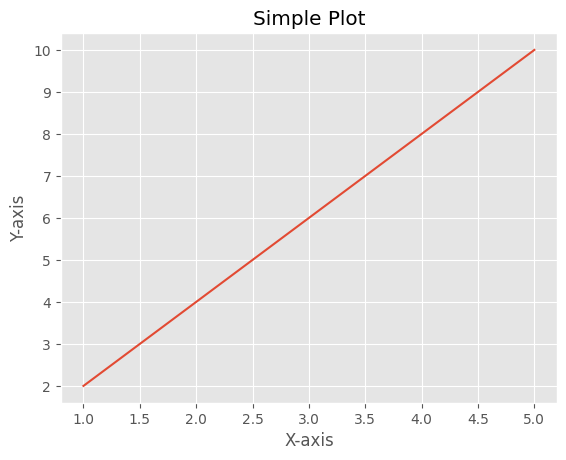

In [24]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# Создание простого графика
x = [1, 2, 3, 4, 5]
y = [2, 4, 6, 8, 10]

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Simple Plot')
plt.show()